In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [2]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
data=pd.read_csv("Dealing_Data.csv")

In [10]:
data["X"]=data["Account Number"].apply(lambda x: x[0])
train=data[data.X=="M"]
test=data[data.X=="V"]
del data["X"], train["X"], test["X"]

data.shape, train.shape, test.shape

((14952, 39), (9966, 39), (4986, 39))

In [11]:
data.shape

(14952, 39)

In [12]:
def cont_plot(X,a=8,b=3, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.distplot(train[X],ax=ax1)
    ax1.set_title('Train')
    sns.distplot(test[X],ax=ax2)
    ax2.set_title('Test')
    sns.distplot(data[X],ax=ax3)
    ax3.set_title('Data')

def cate_plot(X,a=8,b=3,order=None, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.countplot(X,data=train,ax=ax1, order=order)
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.1f}%'.format(100.*y/len(train)), (x.mean(), y), ha='center', va='bottom')
    ax1.set_title('Train')
    sns.countplot(X,data=test,ax=ax2, order=order)
    for p in ax2.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax2.annotate('{:.1f}%'.format(100.*y/len(test)), (x.mean(), y), ha='center', va='bottom')
    ax2.set_title('Test')
    sns.countplot(X,data=data,ax=ax3, order=order)
    ax3.set_title('Data')
    for p in ax3.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax3.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')

In [34]:
data.columns

Index(['Account Number', 'Address', 'Scheme', 'Staus', 'Gender', 'Region ',
       ' Sale of Equipment Status', 'Age', 'Equipment Warranty', 'Salary Slab',
       'Professional Info', 'Age of Home', 'Mode', 'Defaults',
       'Last_Month_Payment', 'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_last_two_month',
       'Average_of_data_used_of_last_thre

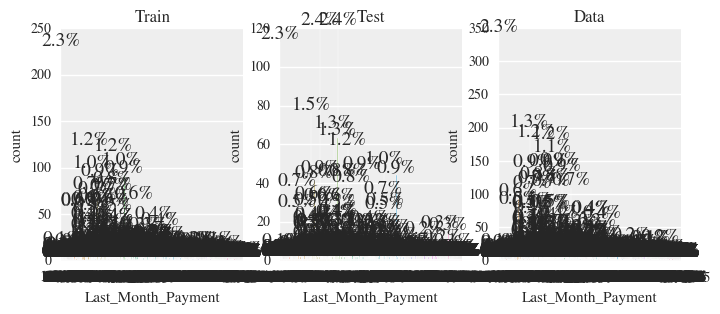

In [35]:
cate_plot("Last_Month_Payment")

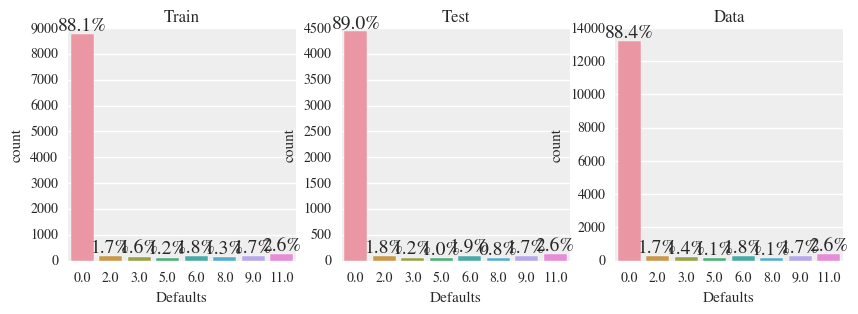

In [33]:
cate_plot("Defaults",a=10)

> # Address

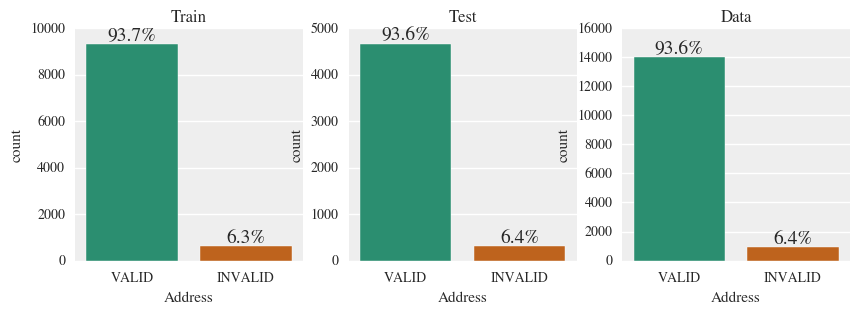

In [14]:
cate_plot("Address",a=10)

> # Scheme

In [15]:
order_Scheme=list(data.Scheme.unique())

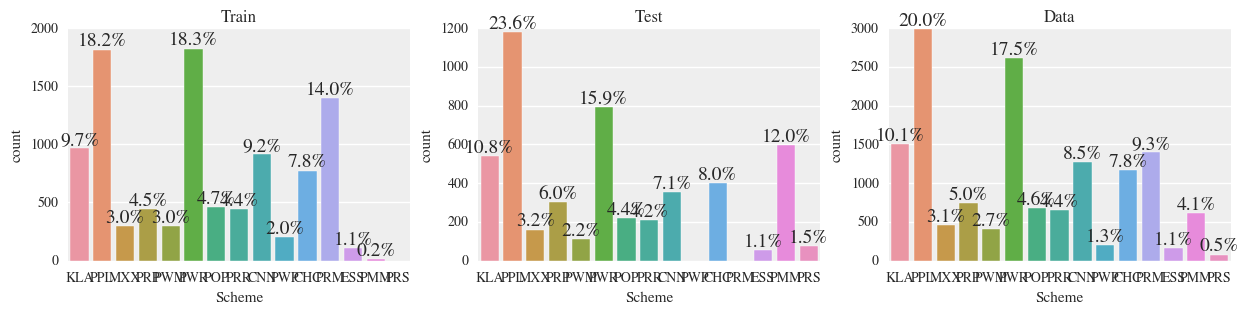

In [16]:
cate_plot("Scheme",15,3,order=order_Scheme)

> # Status

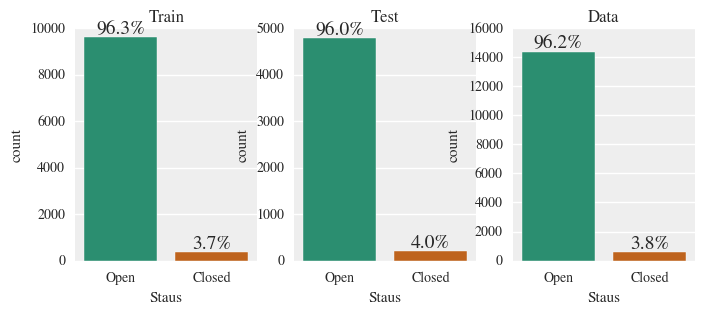

In [18]:
cate_plot("Staus")

> # Gender

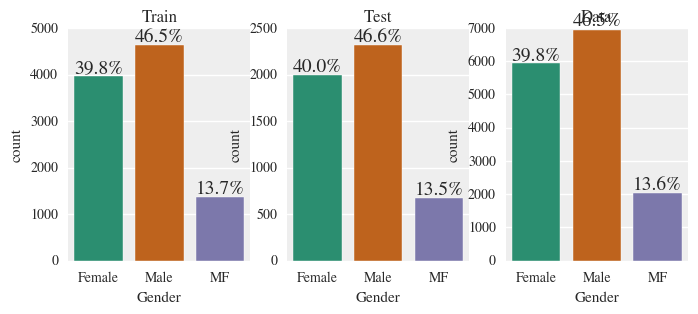

In [19]:
cate_plot("Gender",order=list(data.Gender.unique()))

> # Region

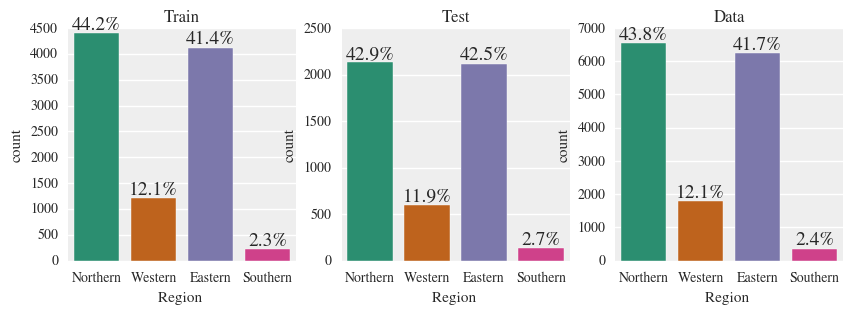

In [20]:
cate_plot("Region ",10, order=list(data["Region "].unique()))

> Sale of Equipment Status

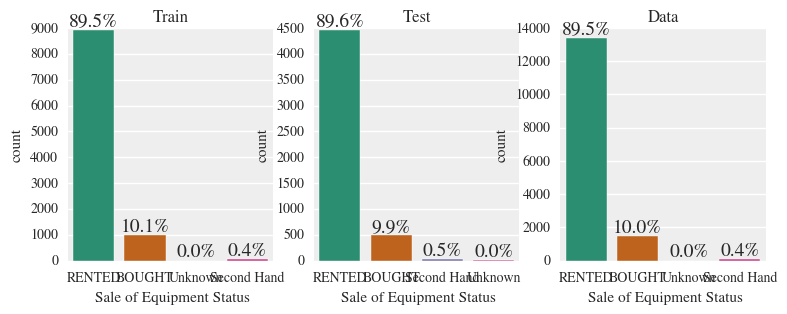

In [21]:
cate_plot(" Sale of Equipment Status",9)

> # Age

C:\Users\HARSH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


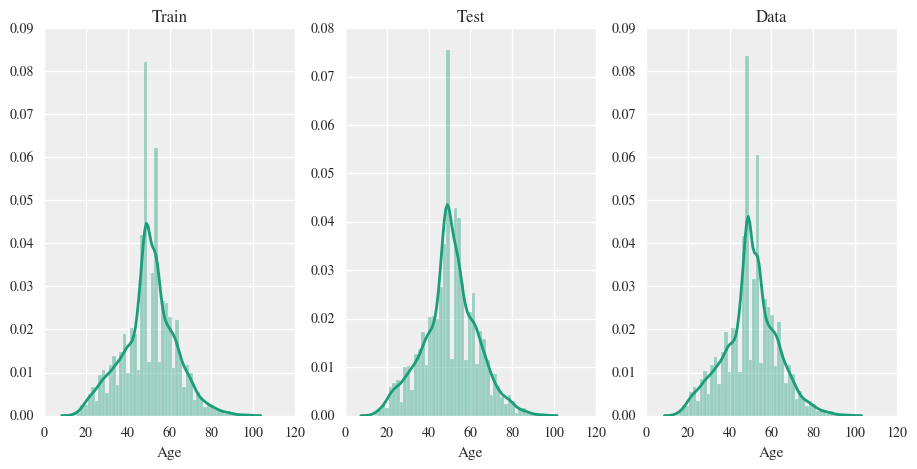

In [22]:
cont_plot("Age",11,5)

> # Equipment Warranty

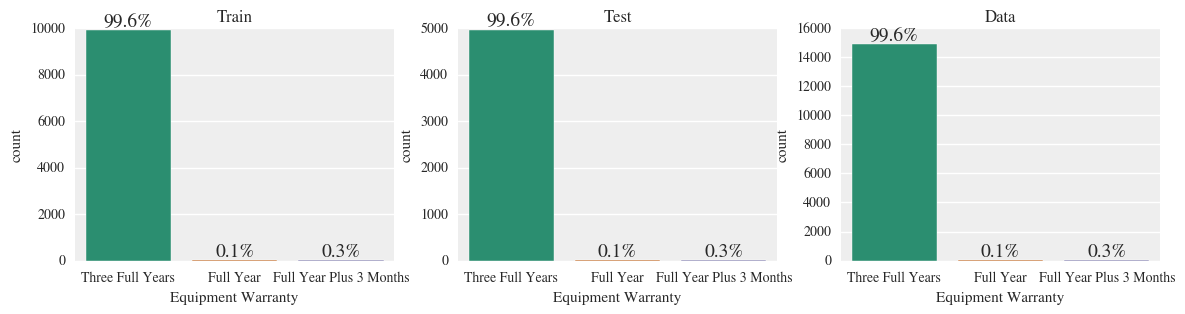

In [23]:
cate_plot("Equipment Warranty",14)

> # Salary Slab

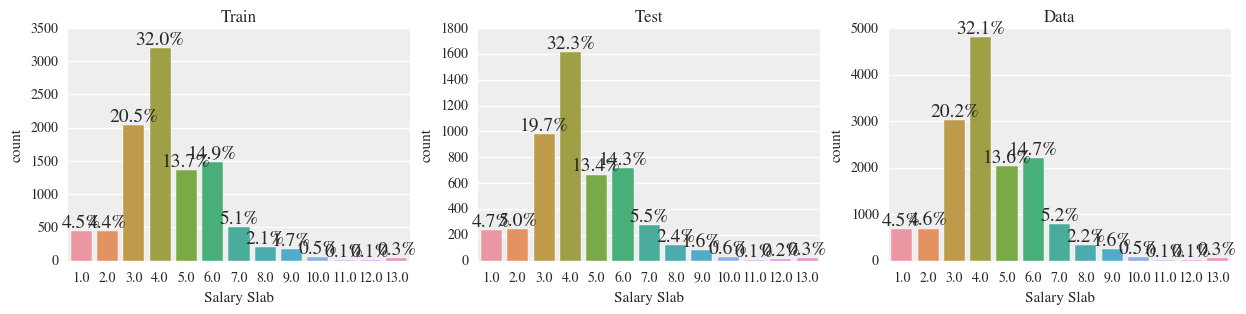

In [24]:
cate_plot("Salary Slab", 15, order= list(np.sort(data["Salary Slab"].unique())))

> # Professional Info

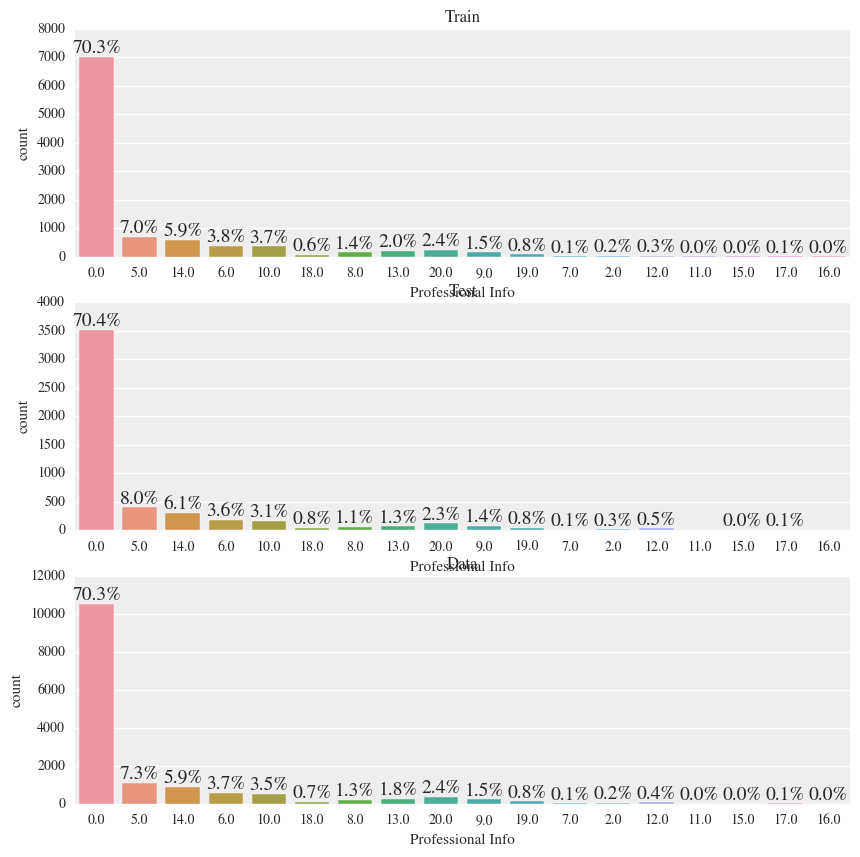

In [25]:
cate_plot("Professional Info", 10, 10,rows=3,columns=1, order=list(data["Professional Info"].unique()))

> # Age of Home

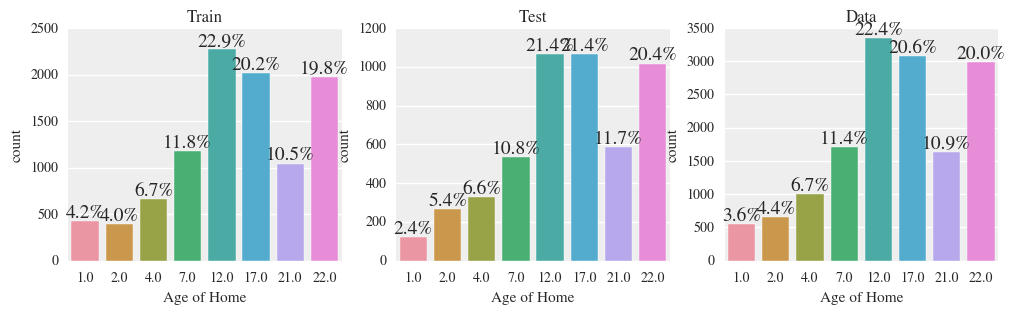

In [26]:
cate_plot("Age of Home", 12)

> # Mode

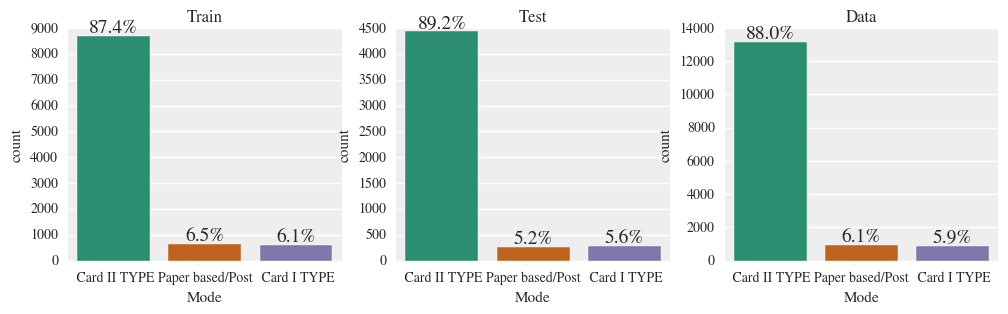

In [27]:
cate_plot("Mode", 12, order = list(data["Mode"].unique()))

> # Payment in all months

In [28]:
plt.hist(train["Sum_1"][train["Sum_1"]<=5000], bins=60 , alpha=.5, label="train", color='r')
plt.hist(test["Sum_1"][test["Sum_1"]<=5000], bins=60 , alpha=.5, label= "test", color='b')
plt.hist(data["Sum_1"][data["Sum_1"]<=5000], bins=60 , alpha=.5, label="data", color='g')
plt.legend(loc="upper right")
plt.show()

KeyError: 'Sum_1'

In [ ]:
cont_plot("Sum_1", 10, 5, rows=3, columns=1)

In [ ]:
cont_plot("Sum_2", 10, 5, rows=3, columns=1)

In [ ]:
cont_plot("Sum_3", 10, 5, rows=3, columns=1)

In [ ]:
cate_plot("Defaults")

In [ ]:
cate_plot("Payment_Settlement_1",15)
cate_plot("Payment_Settlement_2",15)
cate_plot("Payment_Settlement_3",15)

In [ ]:
cate_plot("Tech_1",15)
cate_plot("Tech_2",15)
cate_plot("Tech_3",15)

In [ ]:
cont_plot("Usage Post Limit_Month_1", 10)
cont_plot("Usage Post Limit_Month_2", 10)
cont_plot("Usage Post Limit_Month_3", 10)

In [ ]:
cont_plot("Used pattern_Month_1", 15)
cont_plot("Used pattern_Month_2", 15)
cont_plot("Used pattern_Month_3", 15)

In [ ]:
cont_plot("data used_Month_1", 15)
cont_plot("data used_Month_2", 15)
cont_plot("data used_Month_3", 15)

In [ ]:
cate_plot("Churn")

In [ ]:
data.columns

In [ ]:
#no